# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## .loc[ ] indexing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"Smartphone": ["iPhone 11", "Samsung Galaxy S20", "Google Pixel 4", "LG V60", "Nokia 9", "Sony Xperia 1", "iPhone SE"], "Price": [700,1000,800,700,450,1000,399]})
sample_df.head()

,Smartphone,Price
0,iPhone 11,700
1,Samsung Galaxy S20,1000
2,Google Pixel 4,800
3,LG V60,700
4,Nokia 9,450


You can use the .loc index attribute to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from the "Smartphone" column that have a value of 700 in the "Price" column.


Follow along with the **live coding activity** to see how this works.

In [ ]:
# This code selects all values from the first column, "Smartphone" where the value on that same row in the second column, "Price" is equal to 700
val_700 = sample_df["Smartphone"].loc[sample_df["Price"]==700]
val_700.head()

0    iPhone 11
3       LG V60
Name: Smartphone, dtype: object

Now you try! Let's say you want to view some more expensive phones. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is equal to 1000.

In [ ]:
val_1000 = sample_df["Smartphone"].loc[sample_df["Price"]==1000]
val_1000.head()

1    Samsung Galaxy S20
5         Sony Xperia 1
Name: Smartphone, dtype: object

Let's say you definitely want an iPhone of some sort, but you want to see just iPhone prices. Now select all the values from the "Price" column where the value on that same row in the "Smartphone" column contains the word "iPhone".

In [ ]:
phones = sample_df.loc[sample_df["Smartphone"].str.contains("iPhone")]
phones.head()

,Smartphone,Price
0,iPhone 11,700
6,iPhone SE,399


Let's say you're on a budget and don't want to spend more than $700 on a phone. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is less than or equal to 700.

In [ ]:
val_700_less = sample_df[["Smartphone", "Price"]].loc[sample_df["Price"]<=700]
val_700_less.head()

,Smartphone,Price
0,iPhone 11,700
3,LG V60,700
4,Nokia 9,450
6,iPhone SE,399


#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [3]:
# You will need to import numpy
import numpy as np

In [4]:
df = pd.read_csv("/content/drive/My Drive/Bridge-Up STEM/Unit 3 - Astrophysics/oh_table.csv")
df.head()

our_df = df.loc[df["group_id"]==2]
our_df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
276,38,46975431705914112,HIP 19504,62.677046,18.423125,21.3141,46.969,6.477,5.795,NaN,NaN,NaN,2,118
277,1359,38354676428572288,HIP 18322,58.756565,12.485544,21.8224,45.847,9.676,8.181,NaN,NaN,NaN,2,118
278,1438,315377867997367936,HIP 6978,22.465132,31.007339,23.0783,43.348,7.705,6.682,NaN,NaN,NaN,2,118
279,1615,43538289638888064,HIP 18327,58.777732,16.998376,24.6359,40.605,8.674,7.413,NaN,NaN,NaN,2,118
280,1624,43789768566924416,HIP 17962,57.604583,17.246416,21.0262,47.675,9.126,7.776,NaN,NaN,NaN,2,118


In [5]:
distance = our_df["distance"]
distance.head()

G = our_df["G"]

abs_mag = G-5*np.log10(distance)+5
print(abs_mag)

276    3.117943
277    6.369445
278    4.520155
279    5.631102
280    5.734546
         ...   
389    4.942483
390    7.438620
391    6.777783
392    6.442717
393    6.773982
Length: 118, dtype: float64


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


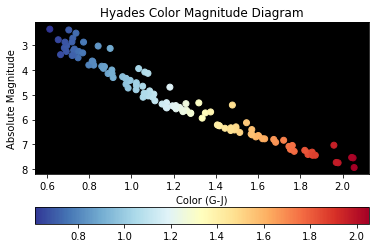

In [ ]:
# color is g-j (x axis)
# abs magnitude (y axis)

g = our_df["G"] # get all values under the column G
j = our_df["J"] # get all values under the column J

color = g-j # set color to g-j
cm = plt.cm.get_cmap("RdYlBu_r")#("autumn_r") # set colormap

plt.clf() # clear any past figures
plt.scatter(color, abs_mag, c=color, cmap=cm) # create the scatterplot
plt.gca().invert_yaxis() # invert the y axis
ax = plt.axes() # this line and the line below
ax.set_facecolor("black") # set the background color
plt.title("Hyades Color Magnitude Diagram") # add title
plt.xlabel("Color (G-J)") # label the x axis
plt.ylabel("Absolute Magnitude") # label the x axis
plt.colorbar(orientation="horizontal") # show the colorbar horizontally
plt.savefig("/content/drive/My Drive/Bridge-Up STEM/Created Graphs and Plots/73020-hyades_color_magnitude_diagram.png") # save the diagram

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


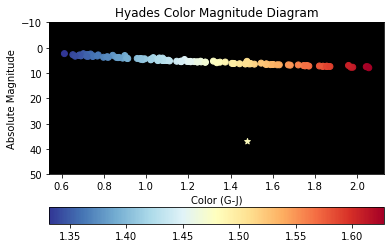

In [6]:
# color is g-j (x axis)
# abs magnitude (y axis)

g = our_df["G"] # get all values under the column G
j = our_df["J"] # get all values under the column J

color = g-j # set color to g-j
cm = plt.cm.get_cmap("RdYlBu_r")#("autumn_r") # set colormap

sun_color = 5.12-3.64
sun_abs_mag = 5.12-5*np.log10(0.0000049215)+5

plt.clf() # clear any past figures
plt.scatter(color, abs_mag, c=color, cmap=cm) # create the scatterplot
plt.scatter(sun_color, sun_abs_mag, c=sun_color, marker="*", cmap=cm) # add the sun
plt.gca().invert_yaxis() # invert the y axis
ax = plt.axes() # this line and the line below
ax.set_facecolor("black") # set the background color
plt.title("Hyades Color Magnitude Diagram") # add title
plt.ylim(50, -10)
plt.xlabel("Color (G-J)") # label the x axis
plt.ylabel("Absolute Magnitude") # label the x axis
plt.colorbar(orientation="horizontal") # show the colorbar horizontally
plt.savefig("/content/drive/My Drive/Bridge-Up STEM/Created Graphs and Plots/73020-hyades_color_magnitude_diagram_with_sun.png")# show the diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


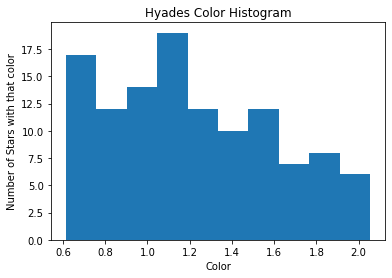

In [ ]:
# color is g-j (x axis)
# abs magnitude (y axis)

g = our_df["G"] # get all values under the column G
j = our_df["J"] # get all values under the column J

color = g-j # set color to g-j

plt.clf() # clear any past figures
plt.hist(color) # create the histogram
plt.title("Hyades Color Histogram") # add title
plt.xlabel("Color") # label the x axis
plt.ylabel("Number of Stars with that color") # label the x axis
plt.savefig("/content/drive/My Drive/Bridge-Up STEM/Created Graphs and Plots/73020-hyades_color_histogram.png") # save the diagram

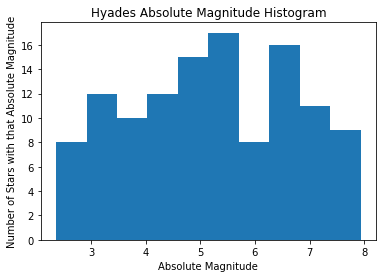

In [ ]:
# color is g-j (x axis)
# abs magnitude (y axis)

g = our_df["G"] # get all values under the column G
j = our_df["J"] # get all values under the column J

color = g-j # set color to g-j

plt.clf() # clear any past figures
plt.hist(abs_mag) # create the histogram
plt.title("Hyades Absolute Magnitude Histogram") # add title
plt.xlabel("Absolute Magnitude") # label the x axis
plt.ylabel("Number of Stars with that Absolute Magnitude") # label the x axis
plt.savefig("/content/drive/My Drive/Bridge-Up STEM/Created Graphs and Plots/73020-hyades_abs_mag_histogram.png") # save the diagram